## Introduction

Phase diagram and entry inquiry.

Written using:
- pymatgen==2017.9.23
- python==2.7

Note that a API key of materials project may be required.

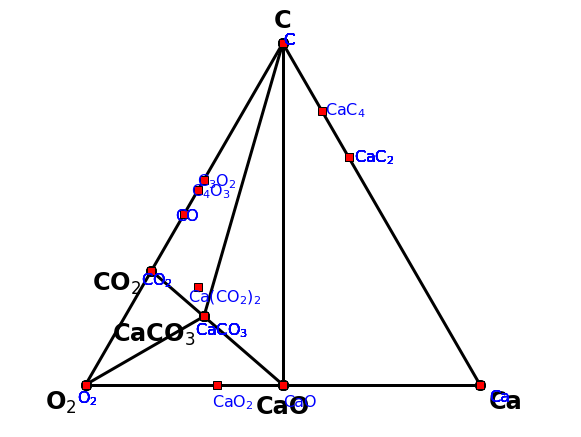

In [4]:
from pymatgen.analysis.phase_diagram import PDPlotter
plotter = PDPlotter(pd, show_unstable=True)
plotter.show()

In [3]:
# %matplotlib inline
import matplotlib
import pymatgen as mg
import os
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter
rester = mg.MPRester(os.environ['PMG_MAPI_KEY'])
# in your shell .profile/.bashrc as: export PMG_MAPI_KEY=" "


entries = rester.get_entries_in_chemsys(['Ca', 'C', 'O'])
phasediagram = PhaseDiagram(entries)

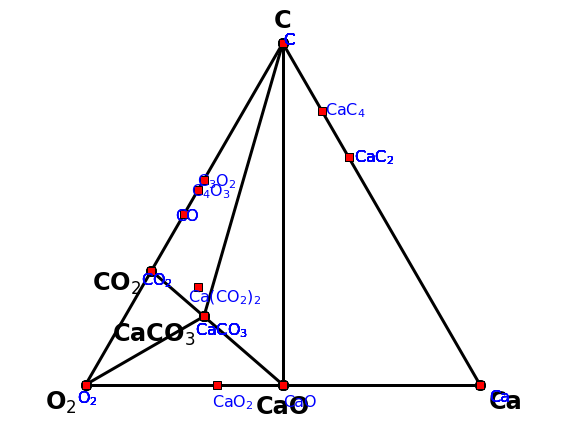

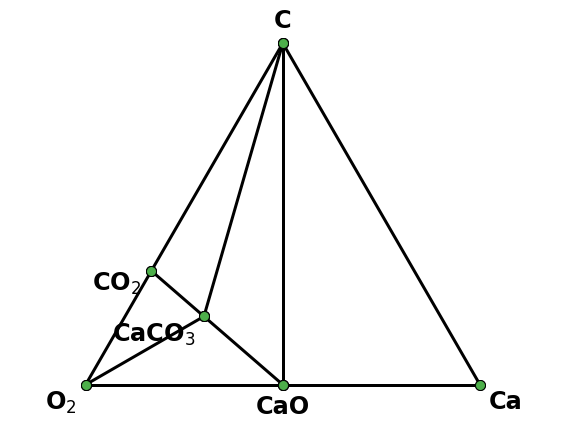

In [6]:
#Let's show all phases, including unstable ones
plotter_1 = PDPlotter(phasediagram, show_unstable=True)
plotter_2 = PDPlotter(phasediagram, show_unstable=False)
plotter_1.show()
plotter_2.show()

## Calculating energy above hull and other phase equilibria properties

To perform more sophisticated analyses, use the PDAnalyzer object.

In [7]:
import collections

data = collections.defaultdict(list)
for e in entries:
    decomp, ehull = phasediagram.get_decomp_and_e_above_hull(e)
    data["Materials ID"].append(e.entry_id)
    data["Composition"].append(e.composition.reduced_formula)
    data["Ehull"].append(ehull)    
    data["Decomposition"].append(" + ".join(["%.2f %s" % (v, k.composition.formula) for k, v in decomp.items()]))

from pandas import DataFrame
df = DataFrame(data, columns=["Materials ID", "Composition", "Ehull", "Decomposition"])

print(df)

   Materials ID Composition     Ehull                           Decomposition
0        mp-166          Ca  0.013329                                1.00 Ca2
1      mp-10683          Ca  0.396161                                1.00 Ca2
2         mp-21          Ca  0.013583                                1.00 Ca2
3         mp-45          Ca  0.000508                                1.00 Ca2
4    mp-1008498          Ca  0.152771                                1.00 Ca2
5        mp-132          Ca  0.000000                                1.00 Ca2
6     mp-632329           C  0.110332                                1.00 C16
7         mp-47           C  0.160479                                1.00 C16
8     mp-568028           C  0.528945                                1.00 C16
9    mp-1008374           C  0.437262                                1.00 C16
10    mp-568286           C  0.000000                                1.00 C16
11    mp-611426           C  0.145308                           

In [ ]:
pmg_structure = rester.get_structure_by_material_id(structure_id)
pmg_band = rester.get_bandstructure_by_material_id(structure_id)

material_name = pmg_structure.formula.replace('1','').replace(' ','')

spa = SpacegroupAnalyzer(pmg_structure)